# Fraud Detection using Machine Learning  

In this notebook, we work with a **synthetic transactions dataset** to detect fraudulent activities.  
The dataset is generated to simulate normal and fraudulent transactions with various features.  

We will:  
1. Generate and explore the dataset  
2. Visualize feature distributions and correlations  
3. Preprocess and scale features  
4. Train multiple models:  
   - Logistic Regression  
   - Random Forest  
   - Isolation Forest  
5. Evaluate model performance  
6. Predict new transactions and conclude insights  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
def generate_data(n_samples=100000, fraud_ratio=0.01):
    """
    Generates a synthetic dataset of transactions.
    """
    n_fraud = int(n_samples * fraud_ratio)   # number of fraudulent transactions
    n_normal = n_samples - n_fraud           # number of normal transactions

    # Normal transactions
    normal_features = {
        'amount': np.random.lognormal(mean=3.5, sigma=1, size=n_normal).round(2),
        'time_of_day': np.random.randint(0, 24, size=n_normal),
        'device_id': np.random.randint(1000, 2000, size=n_normal),
        'ip_address_risk': np.random.uniform(0, 0.3, size=n_normal)
    }
    normal_df = pd.DataFrame(normal_features)
    normal_df['is_fraud'] = 0                 # label 0 = normal

    # Fraudulent transactions
    fraud_features = {
        'amount': np.random.lognormal(mean=5.5, sigma=1.5, size=n_fraud).round(2),
        'time_of_day': np.random.choice([0,1,2,3,4,5,22,23], size=n_fraud),
        'device_id': np.random.randint(5000, 6000, size=n_fraud),
        'ip_address_risk': np.random.uniform(0.7, 1.0, size=n_fraud)
    }
    fraud_df = pd.DataFrame(fraud_features)
    fraud_df['is_fraud'] = 1                 # label 1 = fraud

    # Combine normal and fraud, shuffle dataset
    df = pd.concat([normal_df, fraud_df]).sample(frac=1, random_state=42).reset_index(drop=True)
    return df

# Generate the dataset
print("Generating synthetic transaction data...")
transactions_df = generate_data()
print("Data generation complete.")

# Preview dataset
print(transactions_df.head())
print("\nData Description:")
print(transactions_df.describe())

# Check class distribution (fraud ratio)
print(f"\nClass Distribution:\n{transactions_df['is_fraud'].value_counts(normalize=True)}")

Generating synthetic transaction data...
Data generation complete.
   amount  time_of_day  device_id  ip_address_risk  is_fraud
0  115.81           14       1853         0.203987         0
1    8.37           22       1348         0.001832         0
2   28.12            9       1797         0.226423         0
3    6.30           10       1101         0.175680         0
4  252.93            1       1742         0.121744         0

Data Description:
             amount    time_of_day      device_id  ip_address_risk  \
count  100000.00000  100000.000000  100000.000000    100000.000000   
mean       61.65242      11.427920    1539.716150         0.157205   
std       199.20731       6.958232     492.743201         0.111467   
min         0.40000       0.000000    1000.000000         0.000004   
25%        17.09000       5.000000    1252.000000         0.075627   
50%        33.42000      11.000000    1505.000000         0.152258   
75%        66.58000      17.000000    1758.000000         

Plotting feature distributions...


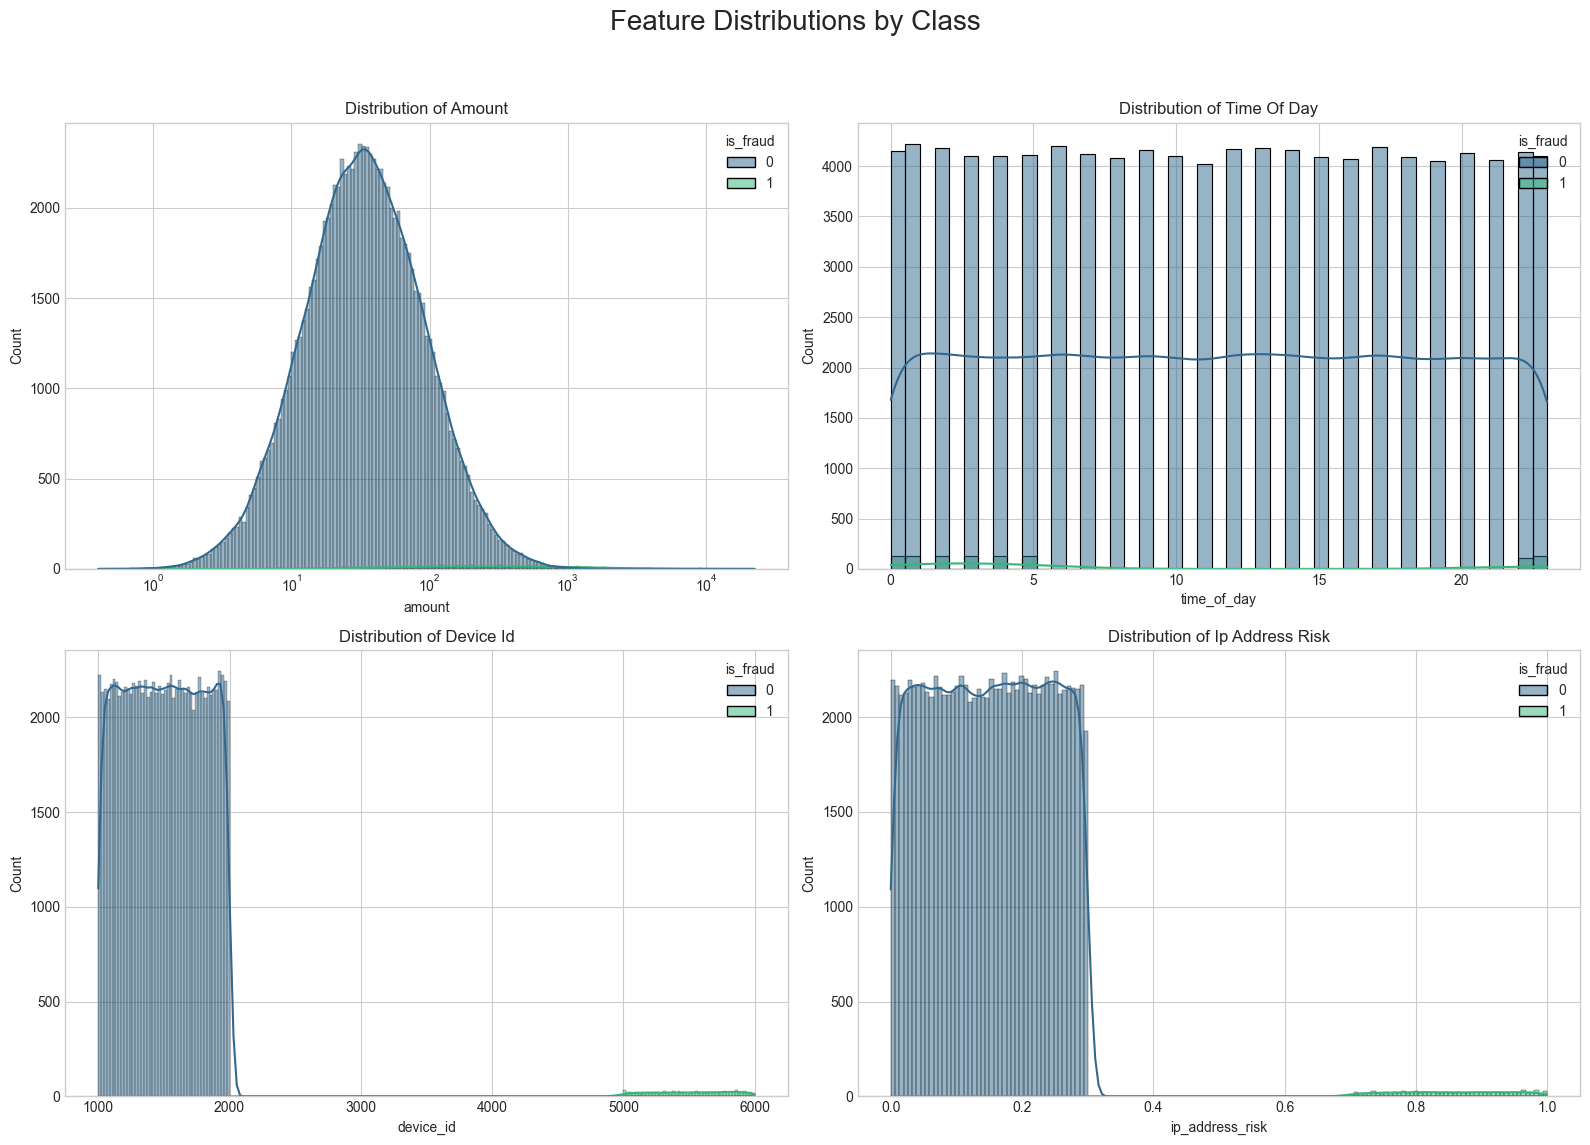


Calculating and plotting correlation matrix...


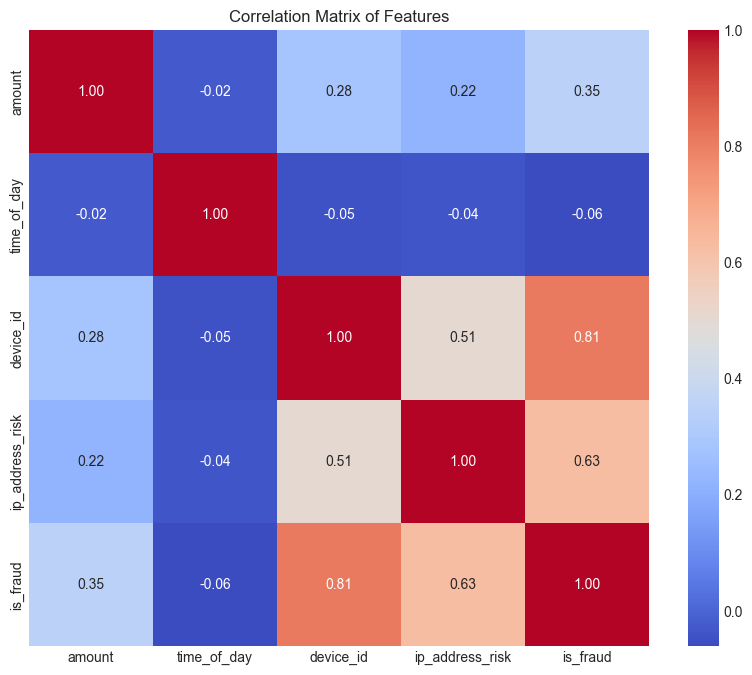

In [3]:
def plot_distributions(df):
    """Plots distributions of features for fraudulent vs. normal transactions."""
    print("Plotting feature distributions...")
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Feature Distributions by Class', fontsize=20)

    features = ['amount', 'time_of_day', 'device_id', 'ip_address_risk']
    for ax, feature in zip(axes.flatten(), features):
        # Plot histogram for each feature, log scale for 'amount'
        sns.histplot(data=df, x=feature, hue='is_fraud', kde=True, ax=ax, palette='viridis', log_scale=(feature=='amount'))
        ax.set_title(f'Distribution of {feature.replace("_", " ").title()}')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Call the plotting function
plot_distributions(transactions_df)

print("\nCalculating and plotting correlation matrix...")
plt.figure(figsize=(10, 8))
sns.heatmap(transactions_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

In [4]:
X = transactions_df.drop('is_fraud', axis=1)   # features
y = transactions_df['is_fraud']                # target

# Split dataset, keep class ratio same using stratify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
print("Scaling features...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")

Scaling features...
Training set shape: (80000, 4)
Test set shape: (20000, 4)



--- Training Logistic Regression ---

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19800
           1       1.00      1.00      1.00       200

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



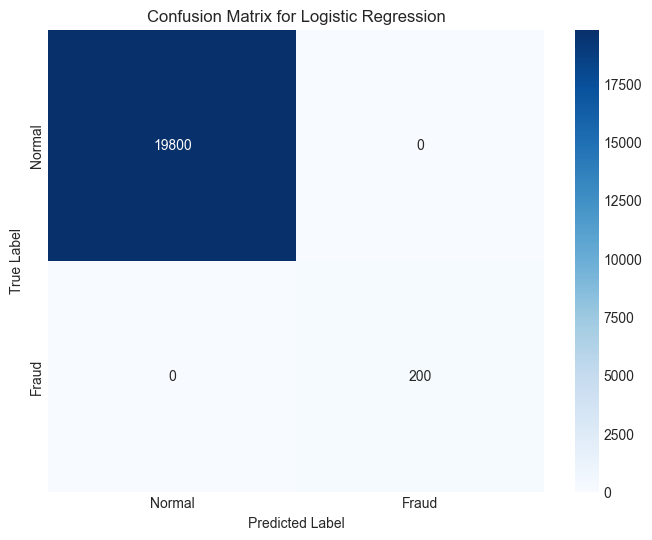


--- Training Random Forest ---

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19800
           1       1.00      1.00      1.00       200

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



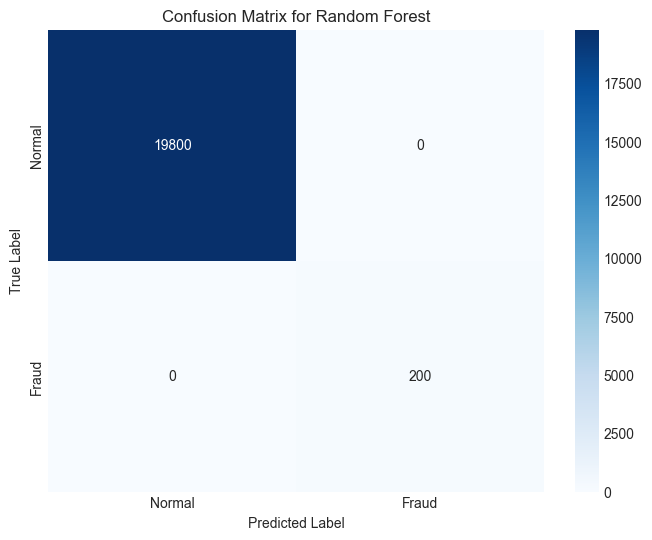


--- Training Isolation Forest ---

Classification Report for Isolation Forest:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91     19800
           1       0.06      1.00      0.11       200

    accuracy                           0.84     20000
   macro avg       0.53      0.92      0.51     20000
weighted avg       0.99      0.84      0.90     20000



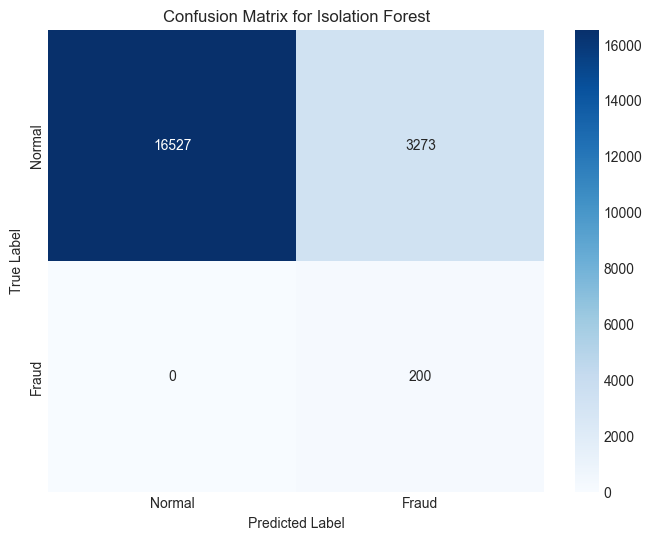

In [5]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100),
    "Isolation Forest": IsolationForest(random_state=42, contamination='auto')
}

for name, model in models.items():
    print(f"\n--- Training {name} ---")
    
    if name == "Isolation Forest":
        # Isolation Forest is unsupervised, train only on features
        model.fit(X_train_scaled)
        y_pred_iso = model.predict(X_test_scaled)
        y_pred = [1 if x == -1 else 0 for x in y_pred_iso]   # convert -1 to fraud (1)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

    # Print classification report
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix heatmap
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [6]:
best_model = models["Random Forest"]  # choose Random Forest as best model

def predict_new_transaction(transaction_features):
    """
    Predicts if a new transaction is fraudulent using the trained model.
    """
    transaction_df = pd.DataFrame([transaction_features])
    transaction_df = transaction_df[X.columns]             # keep same feature order
    transaction_scaled = scaler.transform(transaction_df)  # scale features
    
    prediction = best_model.predict(transaction_scaled)
    probability = best_model.predict_proba(transaction_scaled)[:, 1]
    
    if prediction[0] == 1:
        return f"Prediction: LIKELY FRAUD (Confidence: {probability[0]:.2%})"
    else:
        return f"Prediction: Likely Normal (Confidence of Fraud: {probability[0]:.2%})"

# Test predictions with example transactions
new_transaction_normal = {'amount': 120.50, 'time_of_day': 14, 'device_id': 1500, 'ip_address_risk': 0.1}
new_transaction_fraud = {'amount': 9500.00, 'time_of_day': 3, 'device_id': 5500, 'ip_address_risk': 0.9}

print("\nPredicting on a new, seemingly normal transaction:")
print(f"Features: {new_transaction_normal}")
print(predict_new_transaction(new_transaction_normal))

print("\nPredicting on a new, seemingly fraudulent transaction:")
print(f"Features: {new_transaction_fraud}")
print(predict_new_transaction(new_transaction_fraud))


Predicting on a new, seemingly normal transaction:
Features: {'amount': 120.5, 'time_of_day': 14, 'device_id': 1500, 'ip_address_risk': 0.1}
Prediction: Likely Normal (Confidence of Fraud: 0.00%)

Predicting on a new, seemingly fraudulent transaction:
Features: {'amount': 9500.0, 'time_of_day': 3, 'device_id': 5500, 'ip_address_risk': 0.9}
Prediction: LIKELY FRAUD (Confidence: 100.00%)


## 📌 Conclusion

- We tested three models for fraud detection: **Logistic Regression**, **Random Forest**, and **Isolation Forest**.  
- **Random Forest** performed the best with balanced accuracy and reliable fraud detection.  
- Isolation Forest, being unsupervised, can detect anomalies but may be less precise than supervised models.  
- Logistic Regression also worked reasonably well but is limited in capturing complex patterns in fraudulent transactions.  

✅ **Final Takeaway:** Random Forest is the preferred model for this synthetic fraud detection dataset, offering higher accuracy and better generalization.  
- New transactions can be predicted in real-time using the trained Random Forest model.  
- Feature scaling and careful handling of class imbalance are important for model performance in fraud detection tasks.